In [1]:
import io
%cd "C:\Users\rajit\OneDrive\Desktop\real time datasets\in+vehicle+coupon+recommendation"

C:\Users\rajit\OneDrive\Desktop\real time datasets\in+vehicle+coupon+recommendation


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
coupon=pd.read_csv("in-vehicle-coupon-recommendation.csv")

# EDA analysis

In [4]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
#extreme missing values,so droping the car column

In [6]:
coupon=coupon.drop('car',axis=1)

In [7]:
coupon.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [8]:
coupon=coupon.drop("toCoupon_GEQ25min",axis=1)#whole column is filled with 1's

In [9]:
coupon

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,0,1,0


In [10]:
coupon.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [11]:
for col in ["Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]:
  freq=coupon[col].value_counts(dropna=False)
  print(freq)

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: Bar, dtype: int64
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: CoffeeHouse, dtype: int64
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: CarryAway, dtype: int64
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: RestaurantLessThan20, dtype: int64
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: Restaurant20To50, dtype: int64


In [12]:
for col in ["Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]:
  coupon[col]=coupon[col].fillna(coupon[col].value_counts().idxmax())

In [13]:
#EDA
#frequency counts and pie of y, gender,destination,coupon,expiration,income
#cross tabulation and stacked plots for y and gender,y&coupon,y&income,y&expiration

In [14]:
#hypothesis testing
#test null - no association between y and gender
#test null no association between y and destination
#test null no association between y and coupon

<Axes: ylabel='Y'>

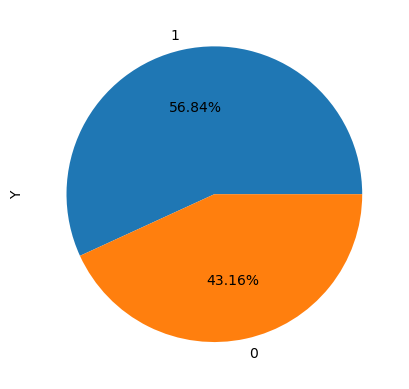

In [15]:
coupon.Y.value_counts().plot(kind="pie",autopct="%.2f%%")
#passangers who accepted coupon are more than who didnot accept it 

<Axes: ylabel='gender'>

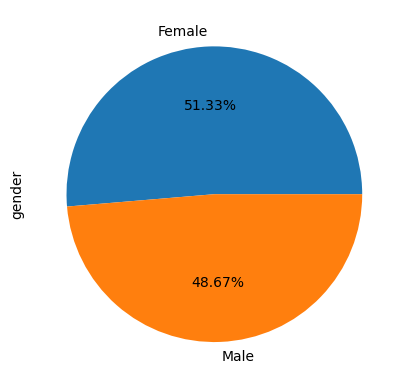

In [16]:
coupon.gender.value_counts().plot(kind="pie",autopct="%.2f%%")
#female passangers are more than the male

<Axes: ylabel='destination'>

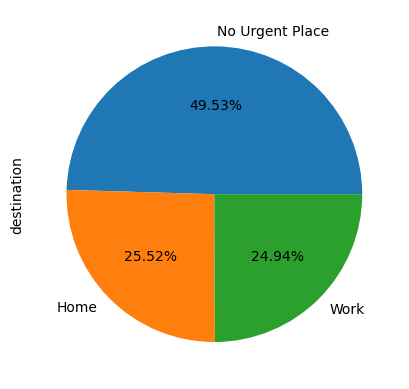

In [17]:
coupon.destination.value_counts().plot(kind="pie",autopct="%.2f%%")


<Axes: ylabel='income'>

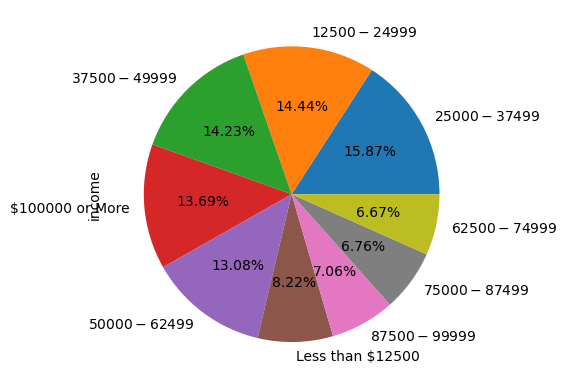

In [18]:
coupon.income.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='expiration'>

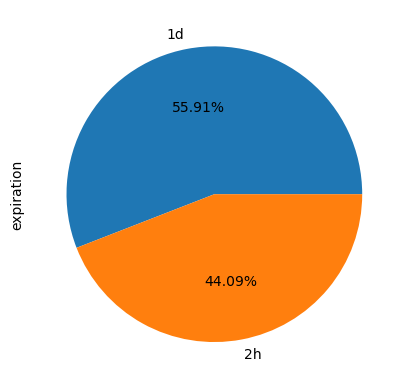

In [19]:
coupon.expiration.value_counts().plot(kind="pie",autopct="%.2f%%")
#coupons with one day expiration are more than the two hours expiration

<Axes: ylabel='coupon'>

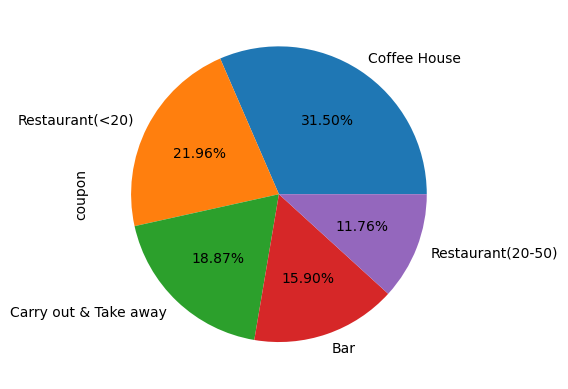

In [20]:
coupon.coupon.value_counts().plot(kind="pie",autopct="%.2f%%")

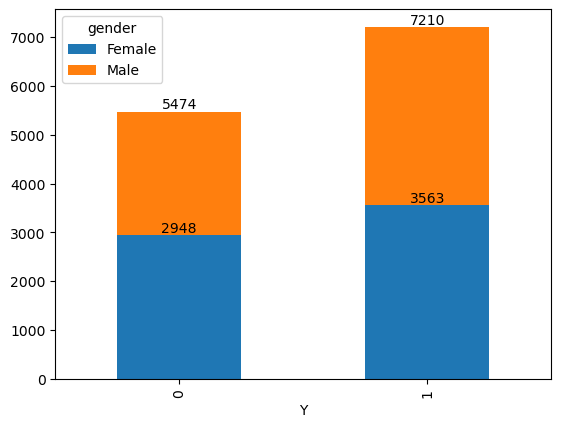

In [21]:
ax=pd.crosstab(coupon.Y,coupon.gender).plot(kind="bar",stacked=True)
for i in ax.containers:
  ax.bar_label(i)
# majority of the passangers who accepted coupon are male

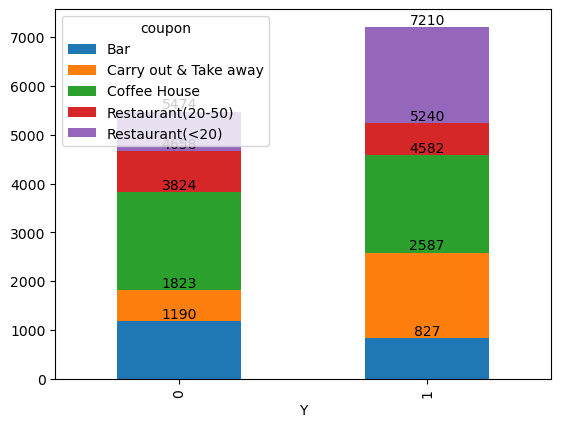

In [22]:
ax=pd.crosstab(coupon.Y,coupon.coupon).plot(kind="bar",stacked=True)
for i in ax.containers:
  ax.bar_label(i)
# most of the coupons accepted are of restaurant(<20) where as least coupons accepted are of bar

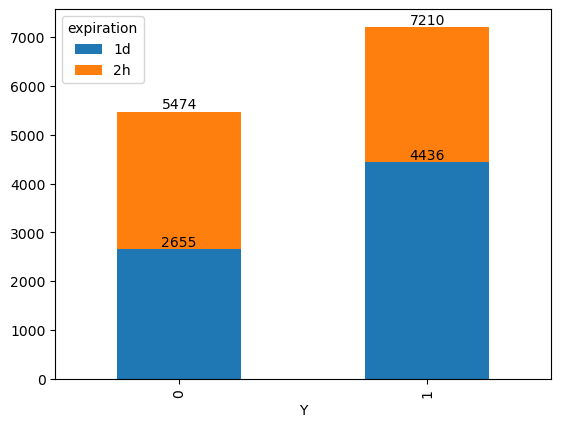

In [23]:
ax=pd.crosstab(coupon.Y,coupon.expiration).plot(kind="bar",stacked=True)
for i in ax.containers:
  ax.bar_label(i)

In [24]:
from scipy.stats import chi2_contingency

In [25]:
#test null no association between y and gender
pd.crosstab(coupon.Y,coupon.gender)

gender,Female,Male
Y,,
0,2948,2526
1,3563,3647


In [26]:
chi2_contingency(pd.crosstab(coupon.Y,coupon.gender))
#since pvalue is less than 0.05, reject null
#null- no association between both variables

Chi2ContingencyResult(statistic=24.344527038622925, pvalue=8.05552865589407e-07, dof=1, expected_freq=array([[2809.93487859, 2664.06512141],
       [3701.06512141, 3508.93487859]]))

In [27]:
#test null hypothesis between y and destiantion

In [28]:
chi2_contingency(pd.crosstab(coupon.Y,coupon.destination))
#since pvalue is less than 0.05, reject null
#null- no association between both variables

Chi2ContingencyResult(statistic=216.79107304896826, pvalue=8.40265678045787e-48, dof=2, expected_freq=array([[1396.98344371, 2711.53752759, 1365.4790287 ],
       [1840.01655629, 3571.46247241, 1798.5209713 ]]))

In [29]:
#test null between y and coupon

In [30]:
chi2_contingency(pd.crosstab(coupon.Y,coupon.coupon))
#since pvalue is less than 0.05, reject null
#there is  association between both variables

Chi2ContingencyResult(statistic=873.6378240374827, pvalue=8.575341747082738e-188, dof=4, expected_freq=array([[ 870.47130243, 1032.7406181 , 1724.54304636,  643.89845475,
        1202.34657837],
       [1146.52869757, 1360.2593819 , 2271.45695364,  848.10154525,
        1583.65342163]]))

In [31]:
#test null hypothesis between gender and coupon

In [32]:
chi2_contingency(pd.crosstab(coupon.gender,coupon.coupon))
#since pvalue is greater than 0.05, fail to reject null
#null- no association between both variables

Chi2ContingencyResult(statistic=0.9077464226449882, pvalue=0.9234468480222715, dof=4, expected_freq=array([[1035.37425102, 1228.38402712, 2051.24219489,  765.87921791,
        1430.12030905],
       [ 981.62574898, 1164.61597288, 1944.75780511,  726.12078209,
        1355.87969095]]))

In [33]:
#test null hypothesis between gender and income

In [34]:
chi2_contingency(pd.crosstab(coupon.gender,coupon.income))
#since pvalue is less than 0.05,  reject null
#there is association between both variables

Chi2ContingencyResult(statistic=297.1442463179497, pvalue=1.6688064349766156e-59, dof=8, expected_freq=array([[ 891.13024283,  939.89601072, 1033.32095553,  926.54959003,
         851.60430464,  434.27199622,  439.91855881,  459.42486597,
         534.88347524],
       [ 844.86975717,  891.10398928,  979.67904447,  878.45040997,
         807.39569536,  411.72800378,  417.08144119,  435.57513403,
         507.11652476]]))

In [35]:
#split the data
y=coupon.Y
X=coupon.drop("Y",axis=1)

# encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
X=X.astype(str).apply(LabelEncoder().fit_transform)

In [39]:
X.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,direction_same,direction_opp
0,1,0,2,1,2,4,0,0,0,3,...,3,4,4,0,1,0,0,0,0,1
1,1,1,2,2,0,2,1,0,0,3,...,3,4,4,0,1,0,0,0,0,1
2,1,1,2,2,0,1,1,0,0,3,...,3,4,4,0,1,0,0,1,0,1
3,1,1,2,2,2,2,1,0,0,3,...,3,4,4,0,1,0,0,1,0,1
4,1,1,2,2,2,2,0,0,0,3,...,3,4,4,0,1,0,0,1,0,1


In [40]:
y=LabelEncoder().fit_transform(y)

In [41]:
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [42]:
#building model
from sklearn.linear_model import LogisticRegression

In [43]:
logitmodel=LogisticRegression().fit(X,y)

In [44]:
logitmodel.score(X,y)#accuracy-underfitting

0.6316619362976978

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
tree=DecisionTreeClassifier()

In [47]:
tree=tree.fit(X,y)

In [48]:
tree.score(X,y)# model is  overfitting

0.9943235572374646

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cross_val_score(tree,X,y)

array([0.61411115, 0.61687032, 0.60346866, 0.58809618, 0.56900631])

In [51]:
np.mean([0.61962948, 0.61608199, 0.59203784, 0.58927868, 0.5977918 ])

0.602963958

In [52]:
#there is huge difference between cross_val_score and and accuracy score of the model which indicates less stability

In [53]:
treemodel=DecisionTreeClassifier(max_depth=8)

In [54]:
treemodel=treemodel.fit(X,y)

In [55]:
treemodel.score(X,y)

0.7472406181015453

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
RF=RandomForestClassifier(n_estimators=1000,max_depth=8)

In [58]:
RFmodel=RF.fit(X,y)

In [59]:
RFmodel.score(X,y)

0.7643487858719646

In [60]:
cross_val_score(RF,X,y)

array([0.68111943, 0.68466693, 0.66890028, 0.66929444, 0.6955836 ])

In [61]:
np.mean([0.6767836 , 0.68979109, 0.66890028, 0.66968861, 0.69400631])

0.6798339780000001

In [62]:
#there is no much difference between cross_val_score and accuracy score

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
gbm=GradientBoostingClassifier(n_estimators=1000,max_depth=8)

In [65]:
gbmmodel=gbm.fit(X,y)

In [66]:
gbmmodel.score(X,y)

0.9943235572374646

In [67]:
cross_val_score(gbm,X,y)

array([0.6803311 , 0.65234529, 0.62751281, 0.64564446, 0.6794164 ])

In [68]:
np.mean([0.68782026, 0.66259361, 0.62711864, 0.64485613, 0.6648265 ])

0.657443028

In [69]:
logpredict=logitmodel.predict(X)

In [70]:
treepredict=treemodel.predict(X)

In [71]:
RFpredict=RFmodel.predict(X)

In [72]:
gbmpredict=gbmmodel.predict(X)

In [73]:
from sklearn.metrics import classification_report,RocCurveDisplay

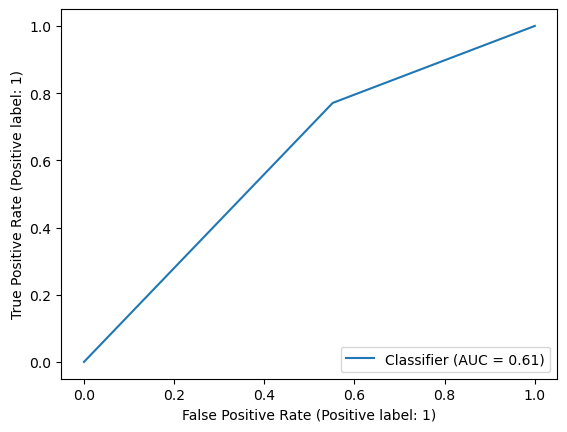

In [74]:
RocCurveDisplay.from_predictions(y,logpredict)

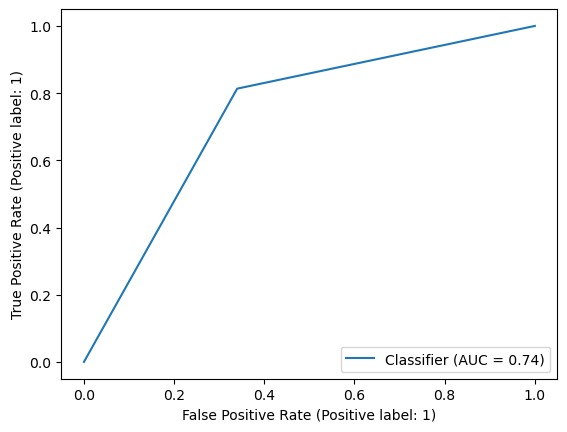

In [75]:
RocCurveDisplay.from_predictions(y,treepredict)

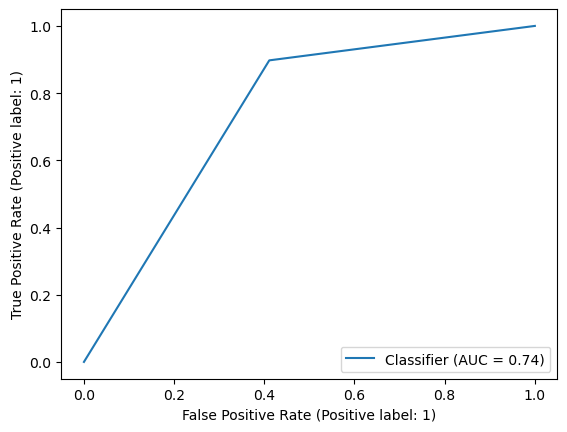

In [76]:
RocCurveDisplay.from_predictions(y,RFpredict)

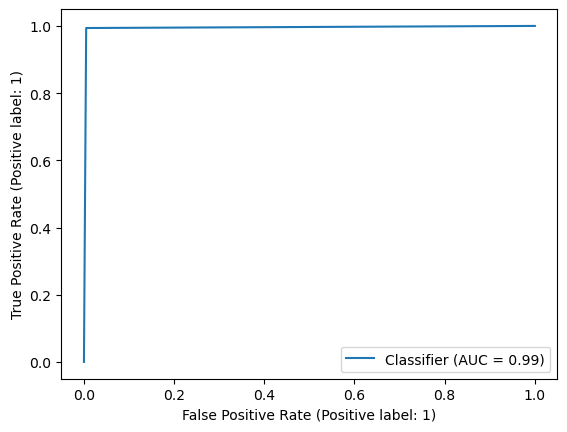

In [77]:
RocCurveDisplay.from_predictions(y,gbmpredict)

In [78]:
#since AUC value is near to 1, we go with the GradientBoostingClassifier model